In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# AWS Twitter Labelled Tweets are available here: 
# https://s3.console.aws.amazon.com/s3/buckets/aml-sample-data/?region=us-east-2
#   File:  social-media/aml_training_dataset.csv
    
# Complete AWS Provided Solution:
# https://github.com/awslabs/machine-learning-samples/tree/master/social-media

In [31]:
df = pd.read_csv('aml_training_dataset.csv')

In [32]:
print('Rows: {0}, Columns: {1}'.format(df.shape[0],df.shape[1]))

Rows: 10008, Columns: 45


In [33]:
df.columns

Index(['created_at_in_seconds', 'description', 'favorite_count', 'favorited',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'in_reply_to_screen_name', 'in_reply_to_status_id',
       'in_reply_to_user_id', 'location', 'r.created_at_in_seconds',
       'r.description', 'r.favorite_count', 'r.favorited',
       'r.favourites_count', 'r.followers_count', 'r.friends_count',
       'r.geo_enabled', 'r.in_reply_to_screen_name', 'r.in_reply_to_status_id',
       'r.in_reply_to_user_id', 'r.location', 'r.retweet_count',
       'r.screen_name', 'r.sid', 'r.statuses_count', 'r.text', 'r.time_zone',
       'r.uid', 'r.user.name', 'r.utc_offset', 'r.verified', 'retweet_count',
       'screen_name', 'sid', 'statuses_count', 'text', 'time_zone', 'uid',
       'user.name', 'utc_offset', 'verified', 'trainingLabel'],
      dtype='object')

In [34]:
# trainingLabel contains the class
# Valid values are: 
#  0 = Ignore
#  1 = Followup
tweet_ignore = df['trainingLabel'] == 0
tweet_followup = df['trainingLabel'] == 1

In [35]:
# Some examples of tweets that are classified as requiring follow-up
for i in range(15):
    print(df[tweet_followup]['text'].iloc[i])
    print()

Visit @awscloud Sept 11-16 #Amsterdam to learn how their services can help YOU @IBCShow. http://t.co/110YOIlTbU

It's insulting that @awscloud marked an EBS volume limit increase support request as low severity but I can't do anything while I wait.

dear @awscloud it would be really great to have custom tabs on the aws console with searches on. I have too many instances already :)

@awscloud chat about a future guest spot on #MobileChat to discuss how infrastructure backend is just as important as mobile front end?

"RT @aneel: I wonder how much @eucalyptus's api thing with @awscloud was worth to @hphelioncloud https://t.co/tKUNboFkn1” << $$$

How to build scalable #applications on the @awscloud platform: http://t.co/WrCtaFU4jq

Seriously though, @awscloud - how is the request rate limit determined? How do I get it boosted?

@awscloud It would be cool if we received an alert that we are nearing a service limit before we actually hit it.

Wondering if @awscloud is still using #TrueCrypt

In [36]:
# Some examples of tweets that are classified as ignorable
for i in range(10):
    print(df[tweet_ignore]['text'].iloc[i])
    print()

@JeffBezosAmazon @amazon @awscloud -> Jeff get's into the Act. http://t.co/QYVgBd8o0b  #ALSIceBucketChallenge

Super excited to take this selfie at #seedcamp today - thanks to @awscloud for hosting :) http://t.co/4849U96iJS

The stage is set at @awscloud in Holburn for our second day of mentoring, this time with investors #seedcamp http://t.co/868c0aDQNl

RT @seedcamp The stage is set at @awscloud in Holburn for our second day of mentoring, this time with investors! http://t.co/y88oKRYW04

Warming up for the final pitches at @seedcamp week London #investor day. Thanks to @awscloud for hosting us. http://t.co/7CNRlo9tYa

That is one full room at @awscloud as our mentoring day kicks off with an intro from @phylosopher #seedcamp http://t.co/70MEiflur4

Cloud Pioneer http://t.co/Kox4nZ8ajx @awscloud @cloudfoundry  @HELPLINE_Corp @JLU122 @Aco63

Standing room only @seedcamp London week, hosted at @awscloud. #seedcamp http://t.co/PYUtzSuVtY

Thanks to @AWScloud for hosting us today and havin

In [37]:
# Model 1: Use all features as-is (baseline performance)
# AWS ML - Text is tokenized on whitespace
# Case is preserved and punctuations are preserved

s = "How is the request rate limit determined?"
print(s)
print()
print ('\t',s.split(' '))

How is the request rate limit determined?

	 ['How', 'is', 'the', 'request', 'rate', 'limit', 'determined?']


In [38]:
# Model 2: Use AWS ML Data Transformation
#  1. Convert text to lower case
#  2. Remove prefix or suffix punctuations
#  3. Use NGRAM and form two word combinations

s = "How is the request rate LIMIT Determined?"
print (s)
print (s.lower())
print()
print ('lower case')
print('\t',s.lower().split(' '))
print()
s = "How is the request rate LIMIT Determined"
print ('after removing punctuation')
print ('\t',s.lower().split(' '))
print()
print ('words alter meaning')
print ('\t',"this is working. not disappointed (trainingLabel=0)")
print ('\t',"this is not working. disappointed (trainingLabel=1)")
print ()
print ('\t',"this is working. not disappointed".split(),"(trainingLabel=0)")
print ('\t',"this is not working. disappointed".split(),"(trainingLabel=1)")
print ()

print ('NGRAM - size 2')
print ('\t',["this is", "is working", "working not", "not disappointed"])
print('\t',["this is", "is not", "not working", "working disappointed"])

How is the request rate LIMIT Determined?
how is the request rate limit determined?

lower case
	 ['how', 'is', 'the', 'request', 'rate', 'limit', 'determined?']

after removing punctuation
	 ['how', 'is', 'the', 'request', 'rate', 'limit', 'determined']

words alter meaning
	 this is working. not disappointed (trainingLabel=0)
	 this is not working. disappointed (trainingLabel=1)

	 ['this', 'is', 'working.', 'not', 'disappointed'] (trainingLabel=0)
	 ['this', 'is', 'not', 'working.', 'disappointed'] (trainingLabel=1)

NGRAM - size 2
	 ['this is', 'is working', 'working not', 'not disappointed']
	 ['this is', 'is not', 'not working', 'working disappointed']


In [39]:
# Model 3 - Train with only text

In [40]:
# Model 4 - Train with only root words using Stemming
print ('Stem to the root word')
print()
print ('All these words are treated differently')
print ('\t',["working", "worked", "works"])
print ()
print ('After stemming - words have same root')
print ('\t',["work", "work", "work"])

Stem to the root word

All these words are treated differently
	 ['working', 'worked', 'works']

After stemming - words have same root
	 ['work', 'work', 'work']


In [41]:
# Data Types, Missing Values and Ratios Example code adapted from: 
# Reference: https://www.kaggle.com/sudalairajkumar/simple-exploration-notebook-zillow-prize

# Explore data types
data_types = df.dtypes.reset_index()
data_types.columns = ["ColumnName", "ColumnType"]

In [42]:
data_types.groupby("ColumnType").count()

,ColumnName
ColumnType,
bool,3
int64,10
float64,15
object,17


In [43]:
# Missing Values Stat
# Number of missing values in each column
missing_df= df.isna().sum(axis=0).reset_index() 
missing_df.columns = ['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / df.shape[0]

In [44]:
missing_df.sort_values('missing_ratio',ascending=False)

,column_name,missing_count,missing_ratio
21,r.in_reply_to_status_id,9575,0.956735
20,r.in_reply_to_screen_name,9498,0.949041
22,r.in_reply_to_user_id,9498,0.949041
28,r.text,8632,0.862510
26,r.sid,8632,0.862510
12,r.created_at_in_seconds,8632,0.862510
14,r.favorite_count,8632,0.862510
15,r.favorited,8632,0.862510
24,r.retweet_count,8632,0.862510
9,in_reply_to_status_id,8616,0.860911


In [45]:
missing_df = missing_df.loc[missing_df['missing_count']>0]

In [46]:
missing_df = missing_df.sort_values(by='missing_ratio').reset_index()

In [47]:
ind = np.arange(missing_df.shape[0])

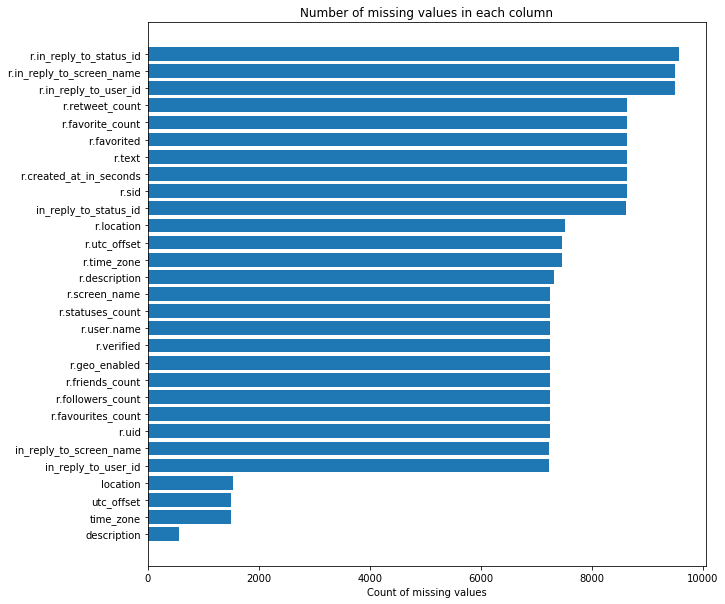

In [48]:
width = 0.9
fig, ax = plt.subplots(figsize=(10,10))
rects = ax.barh(ind, missing_df.missing_count.values)
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

In [49]:
missing_columns = missing_df['column_name'].values

In [50]:
# If value is missing,
#   put "missing" token for object columns
#   put 0 for numeric columns

for col in missing_columns:
    #print(col,df[col].dtype)
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('missing')
    if df[col].dtype == 'float64':
        df[col] = df[col].fillna(0)

In [51]:
df.head(5)

,created_at_in_seconds,description,favorite_count,favorited,favourites_count,followers_count,friends_count,geo_enabled,in_reply_to_screen_name,in_reply_to_status_id,...,screen_name,sid,statuses_count,text,time_zone,uid,user.name,utc_offset,verified,trainingLabel
0,1410411075,"GM for @theCUBE, the Leading Interview format ...",0,False,1760,1265,2001,True,JeffBezosAmazon,0.0,...,JeffFrick,509927125139202048,13506,@JeffBezosAmazon @amazon @awscloud -> Jeff get...,Pacific Time (US & Canada),19747132,Jeff Frick,-25200.0,False,0
1,1410418911,Everything is Content covers tech #conferences...,0,False,22,183,154,True,missing,0.0,...,contentpurveyor,509959993781919744,1816,Visit @awscloud Sept 11-16 #Amsterdam to learn...,Eastern Time (US & Canada),2465523308,ContentPurveyor,-14400.0,False,1
2,1410422657,"Founder CEO @mailcloud, previously @zaggora. G...",6,False,4870,3733,301,True,missing,0.0,...,malcolmbell,509975703421739008,4244,Super excited to take this selfie at #seedcamp...,missing,135183746,Malcolm Bell,0.0,False,0
3,1410424594,Accelerating startups from prototype to IPO wi...,7,False,2393,50783,3259,True,missing,0.0,...,seedcamp,509983830275407872,5934,The stage is set at @awscloud in Holburn for o...,London,15317462,seedcamp,0.0,False,0
4,1410425306,Online Investment Manager,0,False,50,86,237,False,missing,0.0,...,ZenAssets,509986815164813312,120,RT @seedcamp The stage is set at @awscloud in ...,Kyiv,2207428117,Zen Assets,7200.0,False,0


In [52]:
#df.to_csv('aml_training_dataset_cleaned.csv',index=False)

In [54]:
df = df[['text','trainingLabel']]

In [58]:
df.trainingLabel.value_counts()

0    8587
1    1421
Name: trainingLabel, dtype: int64

In [59]:
# Training = 70% of the data
# Validation = 30% of the data
# Randomize the datset
np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [60]:
rows = df.shape[0]
train = int(.7 * rows)
test = rows - train

In [61]:
rows, train, test

(10008, 7005, 3003)

In [65]:
df_train = df[:train]
df_test = df[train:]

In [66]:
df_train.trainingLabel.value_counts()

0    5994
1    1011
Name: trainingLabel, dtype: int64

In [67]:
df_test.trainingLabel.value_counts()

0    2593
1     410
Name: trainingLabel, dtype: int64

In [71]:
df_train.columns

Index(['text', 'trainingLabel'], dtype='object')

In [72]:
df_train.to_csv('twitter_train.csv',
                index=False,
                header=False,
                columns=['trainingLabel','text'])

In [74]:
df_test.to_csv('twitter_test.csv',
                index=False,
                header=False,
                columns=['trainingLabel','text'])